In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [28]:
matches=pd.read_csv('new_matches.csv')
matches.info()
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [70]:
matches.tail()

,team1,team2,city,toss_decision,toss_winner,venue,winner
751,2,1,Mumbai,field,1,Wankhede Stadium,1
752,5,1,Chennai,bat,5,M. A. Chidambaram Stadium,1
753,10,4,Visakhapatnam,field,4,ACA-VDCA Stadium,4
754,4,5,Visakhapatnam,field,5,ACA-VDCA Stadium,5
755,1,5,Hyderabad,bat,1,Rajiv Gandhi Intl. Cricket Stadium,1


In [30]:
matches[pd.isnull(matches['winner'])]
#find all NaN values in winner column, so that we update this as draw

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [31]:
matches['winner'].fillna('Draw', inplace=True)

In [32]:
matches.loc[300,'winner']

'Draw'

In [73]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Delhi Capitals','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Deccan Chargers','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','Deccan Chargers','RPS'],inplace=True)


matches.tail(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
754,4,5,Visakhapatnam,field,5,ACA-VDCA Stadium,5
755,1,5,Hyderabad,bat,1,Rajiv Gandhi Intl. Cricket Stadium,1


In [74]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Deccan Chargers':14},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':1,'Deccan Chargers':14},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Deccan Chargers':14},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Deccan Chargers':14,'Draw':15}}
matches.replace(encode, inplace=True)
matches.head(4)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9


In [75]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [76]:
#just to say what to do in the next line- 
def nxt_line(a):
    """1. remove any null values, winner has hence fill the null value in winner as draw
2. City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
3. Make sure to impute the data(cleansing and finding missing data), there is also other process 
4. to verify expected value based on other resultants, for now by stadium, city is easily manually updated"""
print(nxt_line.__doc__)

1. remove any null values, winner has hence fill the null value in winner as draw
2. City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
3. Make sure to impute the data(cleansing and finding missing data), there is also other process 
4. to verify expected value based on other resultants, for now by stadium, city is easily manually updated


In [77]:
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          756 non-null    int64 
 1   team2          756 non-null    int64 
 2   city           756 non-null    object
 3   toss_decision  756 non-null    object
 4   toss_winner    756 non-null    int64 
 5   venue          756 non-null    object
 6   winner         756 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 41.5+ KB


In [78]:
#team_match_total=matches.groupby(["team1"]).size()+matches.groupby(["team2"]).size()
#print(team_match_total.get_value(1))
xx=matches.groupby(["toss_winner"]).size()
print(xx)
yy=matches.groupby(["winner"]).size()
print(yy)

toss_winner
1     98
2     92
3     81
4     53
5     89
6     80
7     80
8     15
9     81
10    46
11    13
12     8
13    20
dtype: int64
winner
1     109
2      92
3      84
4      39
5     100
6      75
7      67
8      13
9      82
10     58
11     15
12      6
13     12
14      4
dtype: int64


In [79]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
MI


In [80]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [81]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,756.000000,756.000000,756.000000,756.000000
mean,5.474868,5.472222,5.330688,5.279101
std,3.306931,3.274711,3.216540,3.262492
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.000000,8.000000
max,13.000000,13.000000,13.000000,14.000000


In [87]:

df["city"].unique()


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [88]:

df["venue"].unique()


array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [89]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  0  5  3  1  5  6  4  2  6  7  5  4  7  0  2  0  3  6  5
  1  2  6  5  1  4  6  8  1  2  8  0  5  1  7  6  7  4  0  7  4  8  0  8
  9  5  7  9  6  1  7  5  4  4  0  4  8  7  5  6 10  0 11  0  8  4 11  5
  8  4  6  7  0 10 11  0  8  5 10  4 11  5  7  6 10  4 11  0 10  8  6  5
  8  7  5  7 10  0  6  4  6  5 11  8  7 11  4  6 10  0  5  5  5 12 12 12
 12 13 14 12 14 12 14 14 13 12 14 13 15 14 14 15 15 16 14 13 17 13 17 16
 14 14 15 15 15 16 18 18 13 17 18 15 15 14 14 14 19 13 17 17 19 15 17 14
 14 15 15 15 17 17  5  5  8  6 11 20  4  6  7  4  7 21 20  5 21 11  5  4
  8  5 20  8  4 20  5  7  5 11  7  6  8 11  5  6  7 22 11 10  6  4  8 22
  4  7 10 22  5 11 10 11 23  4  6 23  7  6  5  5  5  5 11  0 24  7  5  6
 10  4  8  5  0 10  5 11  0  5  6 24  7  5  6  8  5  6  7  0 10 11  7  5
 24  7 10  4 24  6 10 11  5  7  0 11  5 24  0  4  6  5  4  8 10  0  8 10
 11  3  4  5 23  3  5 23 11  5  5 23  7  4  6  5  5 11 11 11  6  5 10  4
 25 10  1 25  4  7  5 11  8  6  7  1  6  4  5 10  4

In [90]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  0  5  3  1  5  6  4  2  6  7  5  4  7  0  2  0  3  6  5
  1  2  6  5  1  4  6  8  1  2  8  0  5  1  7  6  7  4  0  7  4  8  0  8
  9  5  7  9  6  1  7  5  4  4  0  4 10  7  5  6 11  0 12  0 10  4 12 13
 10  4  6  7  0 11 12  0 10 13 11  4 12 13  7  6 11  4 12  0 11 10  6  5
 10  7  5  7 11  0  6  4  6  5 12 10  7 12  4  6 11  0  5  5 13 14 14 14
 14 15 16 14 16 14 16 16 15 14 16 15 17 16 16 17 17 18 16 15 19 15 19 18
 16 16 17 17 17 18 20 20 15 19 20 17 17 16 16 16 21 15 19 19 21 17 19 16
 16 17 17 17 19 19 13 22 10  6 12 23  4  6  7  4  7 24 23 22 24 12 22  4
 10 22 23 10  4 23 13  7 22 12  7  6 10 12 22  6  7 25 12 11  6  4 10 25
  4  7 11 25 22 12 11 12 26  4  6 26  7  6 13 13 13 13 12  0 27  7 13  6
 11  4 10 13  0 11  5 12  0 13  6 27  7  5  6 10  5  6  7  0 11 12  7 13
 27  7 11  4 27  6 11 12  5  7  0 12 13 27  0  4  6  5  4 10 11  0 10 11
 12  3  4  5 26  3 13 26 12 13  5 26  7  4  6  5  5 12 12 12  6  5 11  4
 28 11 29 28  4  7  5 12 10  6  7 29  6  4  5 11  4

In [91]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [92]:
matches.info

<bound method DataFrame.info of      team1  team2           city toss_decision  toss_winner  \
0       10      3      Hyderabad         field            3   
1        1     11           Pune         field           11   
2        8      2         Rajkot         field            2   
3       11      9         Indore         field            9   
4        3      7      Bangalore           bat            3   
..     ...    ...            ...           ...          ...   
751      2      1         Mumbai         field            1   
752      5      1        Chennai           bat            5   
753     10      4  Visakhapatnam         field            4   
754      4      5  Visakhapatnam         field            5   
755      1      5      Hyderabad           bat            1   

                                         venue  winner  
0    Rajiv Gandhi International Stadium, Uppal      10  
1      Maharashtra Cricket Association Stadium      11  
2       Saurashtra Cricket Association S

In [94]:
#Find some stats on the match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 98
KKR -> 92
CSK -> 89
KXIP -> 81
RCB -> 81
DD -> 80
RR -> 80
DC -> 53
SRH -> 46
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8
No of match winners by each team
MI -> 109
CSK -> 100
KKR -> 92
RCB -> 84
KXIP -> 82
RR -> 75
DD -> 67
SRH -> 58
DC -> 39
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Deccan Chargers -> 4


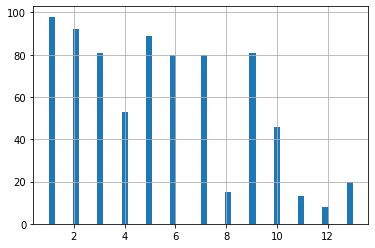

In [95]:
df['toss_winner'].hist(bins=50)

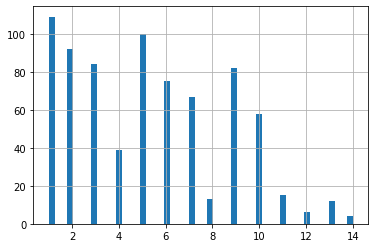

In [96]:
#shows that Mumbai won most matches followed by Chennai
df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match winners')

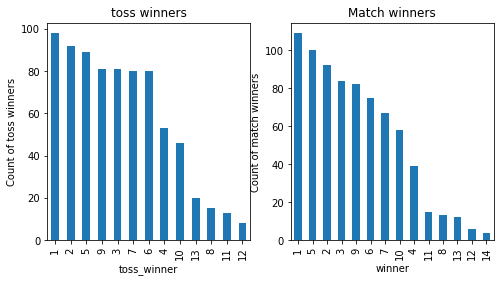

In [97]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [98]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [99]:
#Find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [100]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
753,10,4,32,1,4,0,4
754,4,5,32,1,5,0,5


In [101]:
df.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
5,8,10,15,1,10,28,10
6,2,1,24,1,1,40,1
7,3,9,16,0,3,13,9
8,7,11,27,1,11,21,7
9,10,1,24,1,1,40,1


In [109]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome])
      predictions = model.predict(data[predictors])
      print(predictions)
      accuracy = metrics.accuracy_score(predictions,data[outcome])
      print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  

# LOGISTIC REGRESSION 

In [110]:
#logistic Regression
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ashok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ 9  1  1  9  5  9  1  5  9  1  2  3  9  2 10  1  9  5  9  1 10  2  2  1
 10  9  2  1  2  3  2  9  2  1  9  9  1  9  9  2  9  9  9  3  3  9  5  9
  9  1 10  9  1 10  5  1  9  3  5  3  9  7  1  2  6  5  3  3  3  3  5  2
 10  5  1  2  6  1  5  1  6  2  5  3  3  2  9  1  1  3  9  1  9  5  5  1
  9  3  1 10  1  1  2  3  2  1  5  3  3  5  3  2  1  5  6  6  2  3  5  9
  5  1  2  5  5  3  5  1  1  5  3  1  6  1  5  6  6  2  5  1  5  5  1  5
  9  5  6  3  6  5  2  5  1  1  5  1  6  3  5  5  9  1  1  9  5  6  5  2
  7  3  6  6  1  1  2  2  9  2  5  9  5  2  3  3  5  3  6  2  7  9  2  3
  9  2  6  5  3  6  2  5  2  5  5  2  6  5  2  7  5  1  5  6  5  3  5  1
  3 10  1  1  2  5  5  5  9  3  2  9  5  1  1  2  2  2  5  3  5  5 10  2
  6  3  9 10  1  1  6  5  6 10  2  9  5  6  2  9  1  2  9  1  9  9  2  7
  9  3  1  9 10  2  9  5  1  9  1  5  8  9  3  3  2  1  5 10  6 10  3  1
  5  9  3  1  9  9  7  5 10  2  1  3 10  3  1  1  1  3  5  3  2  9  9  3
  2  1 10  2  3  3  1  5  9  2  5 10  2  5  1  5  5

# Gaussian Naive bayes algorithm

In [111]:
#Gaussian NAive bayes algorithm
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)

[12 12 12 12  5 12  1  5 12 12 12  3 12 12  7 12  3  5 12 12 10 12 12 12
 12 12 12 12 12  8 12 12 12  1 12 12  1 12 12 12 12  3 12 12  3 12  1 12
 12 12  7 12 12 12  5 12  3  3  1  3  5  5  1  2  6  5 12 12 12  3  5 12
  5  5  2 12 12  5  5  5  6 12  6  3 12 12 12  2 12  3 12  1 12  5  2 12
 12 12  1  7 12 12  2  3 12 12  5 12 12  5  3  2 12  5 12  6 12  3  5  9
  3  1 12  5  5  3  5  2  1  6 12  1  6  2  2  6  6  2  5  1 12  1  1  5
 12  5  1  6  6  2 12  5  1 12  5  1  6 12  5  5  9  1 12 12  6  5  5 12
  5  6  1  6 12 12 12  2 12 12  5  6  3  2 12  3  5 12  5  2  5 12  2  3
 12 12  5  5  3  6 12  5 12  5  5  2  6  5  2  2  5  6  5  6  2  3  1  1
  3  7 12 12  2  5  6  5 12  3  2 12  5  2  2  2  2  2  5 12 10  2 13  2
  6  3 12 13 12 12 12  5 12 12 12 12  5 13 12 12 12 12 12 12 12 12 12 13
 12 12 12 12 10 12 12  5 12 12 12  5 12 12 12  3  2 12  9 10 12 10 12 12
  5 12  3  1 12 12 12  7 10 12  1 12 10  3 12 12  1  3  5 12 12 12 12  3
 12 12 13  2  3 12 12  5 12  2  5 10 12  5 12  5 10

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Applying KNN algorithm

In [112]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[10  3  3  9  3 10  1  9 11  1  2  1  9  2  9  9  3  2 10  3 10  1  8  1
 11  9  2 11  2  3  2 10  2  1  9 10  1 11  7  2  7  9  9  1  2  8 10  9
  7  9 10  7  1 11  4 11  2  1 10  3  5  5  1  2  6  7  5  6  9  6  5  1
  9  3  1  3  9  6  5  4  2  1  6  9  5  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  2  1  5  7  6  9  5  9  1  5  3  2  6  7  6  1  6  1  1  9
  4  4  2  4  7  2  3  3  2  7  3  1  5  4  9  5  5  1  3  5  3  2  4  5
  5  3  2  5  5  7  9  4  1  4  4  3  1  3  4  3  9  1  4  3  7  4  3  2
  3  7  3  2  4  4  1  1  9  2  3  6  3  2  1  3  7  4  6  1  4  5  1  3
  9  1  6  1  3  6  1  2  1  5  7  2  2  5  1  2  2  6  1  6  2  3  1  4
  3  9  6  4  1  5  6  5  4  1  2  4  4  2  1  3  2  5  2  6  3  1 13  2
  6  1  9 13  4  2  1  5  9  4  2  4  4  1  2  9  5  2  9  1  6  5  3  2
  4  3  6  3  7  2  6  5  1 10  1  5  1  2  6  9  2  1  3 10  6 10  9  2
  5  9  3  1  9  9  2  7  5  2  1  4  7  3  1  5  1  1  5  5  2 11  6  7
  1  2  7  1  3  7  1  5  9  2  4  4  2  3  1  6  3

<ipython-input-109-4e7825e15126>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(data[predictors],data[outcome])


In [113]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2


In [114]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=1, gamma=1) 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
classification_model(model, df,predictor_var,outcome_var)

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  6  1  2  6  7  5  6  9  6  5  1
  9  5  1  3  9  6  5  3  9  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  6  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  5  6  2  3  1  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  1  1  5  3  5  2  6  3  7 13  2
  6  1  9 13  4  2 12  5  9  7  2  5  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  6
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  5  2 13  6  3
  5  2  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

In [115]:
#Gradient boost algorithm
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0)
classification_model(model, df,predictor_var,outcome_var)

C:\Users\ashok\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1 11  2 10  3 10  1  8  1
 11  9  3 11  2  8  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  6  1  2  6  7  5  6  9 14  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  3  6  9  5  9  1  5  4  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  3  4  7  9  4  1  6  3  9  7  5  1  3  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  5  6  2  4  1  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  1  1  5  3  5  2  6  3  7 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  5  2 13  6  3
  5  2 13  1  3  7  1  5  9  2  4  5  2  6  1  6  3

In [116]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  2
  7  9  7 10  1 11  3 11  2  1  1  3  5  6  1  2  6  7  1  6  9  6  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  3  4  7  9  4  1  6  3  9  7  5  1  3  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  3  1  4
  3  9  6  4  1  5  3  5  4  1  2  5  4  1  1  5  3  5  2  6  3  1 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  5 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  1  2 13  6  3
  5  2  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

In [117]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

<ipython-input-109-4e7825e15126>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(data[predictors],data[outcome])


[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  6  1  2  6  7  1  6  9  6  5  1
  9  5  1  3  9  6  5  3  2  1  6  9  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  7  6  9  5  9  1  5  4  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  7  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  4  9  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  1  1  5  3  5  2  6  3  1 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  5  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  9  2  1  3 13  6 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  1  7 13  6  7
  5  2  9  1  3  7  1  5  9  2  4 13  2  6  1  6  3

In [118]:
df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3


In [119]:
test=pd.read_csv("test.csv")
test.head()

,team1,team2,city,toss_winner,venue,toss_decision,date,winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR
2,KKR,MI,3,MI,3,0,5-May,MI
3,CSK,MI,7,CSK,7,1,7-May,MI
4,DC,CSK,22,CSK,24,1,10-May,CSK


In [120]:
test = test.drop(["date","winner"], axis=1,inplace=False)

In [121]:
test.replace(encode, inplace=True)
test.head(2)

,team1,team2,city,toss_winner,venue,toss_decision
0,9,1,3,1,3,0
1,10,6,5,6,5,0


In [122]:
out = model.predict(test)

In [123]:
out

array([1, 6, 1, 5, 5], dtype=int64)

In [124]:
predicted_winner=[]
for i in out:
    #print(list(dicVal.keys())[list(dicVal.values()).index(i)])
    predicted_winner.append(list(dicVal.keys())[list(dicVal.values()).index(i)])

In [125]:
ipl=pd.read_csv('test.csv')
ctr=0
k=0
total=len(ipl['winner'])
for i in ipl['winner']:
    if i==predicted_winner[k]:
        ctr=ctr+1
    k=k+1  
print(ctr)
print("Accuracy of our prediction of recent IPL is ", ctr/total)

4
Accuracy of our prediction of recent IPL is  0.8


In [126]:
predicted_winner

['MI', 'RR', 'MI', 'CSK', 'CSK']

In [127]:
sub = pd.DataFrame()
sub['team1'] = ipl['team1']
sub['team2'] = ipl['team2']
sub['venue'] = ipl['venue']
sub['toss_winner'] =ipl['toss_winner']
sub['city'] = ipl['city']
sub['toss_decision'] = ipl['toss_decision']
sub['date of match']=ipl['date']
sub['actual_winner']=ipl["winner"]
sub['Predicted_winner'] = predicted_winner
sub.to_csv('ipl2.csv',index=False)

In [128]:
sub.head(5)

,team1,team2,venue,toss_winner,city,toss_decision,date of match,actual_winner,Predicted_winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR,RR
2,KKR,MI,3,MI,3,0,5-May,MI,MI
3,CSK,MI,7,CSK,7,1,7-May,MI,CSK
4,DC,CSK,24,CSK,22,1,10-May,CSK,CSK


In [129]:
#feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners 
#followed by toss winning, city
print()
print("Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning, city")
imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print()
print(imp_input)


Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning, city

team2            0.246070
team1            0.225225
venue            0.177257
toss_winner      0.164932
city             0.155446
toss_decision    0.031070
dtype: float64


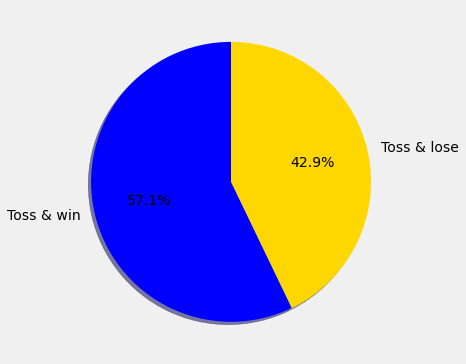

In [146]:
#probability of match winning by winning toss for MI
#df['toss_winner'].value_counts()
count =0
for i in range(756): 
    if df["toss_winner"][i]==df["winner"][i]==1 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 756 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(756-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['blue','gold'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 

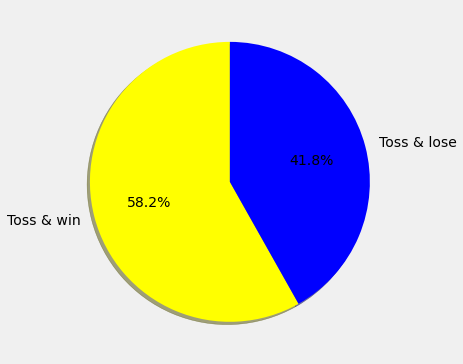

In [150]:
#probability of match winning by winning toss for Chennai Super Kings CSK
#df['toss_winner'].value_counts()
count =0
for i in range(756): 
    if df["toss_winner"][i]==df["winner"][i]==5 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 756 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(756-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['yellow','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 

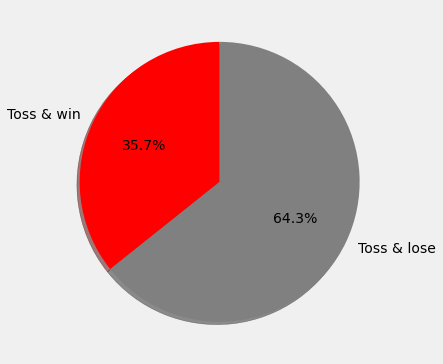

In [142]:
#probability of match winning by winning toss for KXIP
#df['toss_winner'].value_counts()
count =0
for i in range(756): 
    if df["toss_winner"][i]==df["winner"][i]==9 :
        count=count+1
#okay from the above prediction on features, we notice toss winner has least chances of winning matches
#but does the current stats shows the same result
#df.count --> 756 rows
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
#df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==1]
#slices=[len(df_fil),(756-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['red','grey'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Toss winning does not gaurantee a match win from analysis of current stats and thus 
#prediction feature gives less weightage to that 

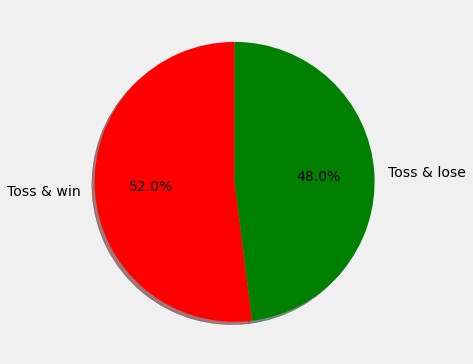

In [143]:
#genralised probbaility for winning match by winning toss


import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]

slices=[len(df_fil),(756-len(df_fil))]

mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

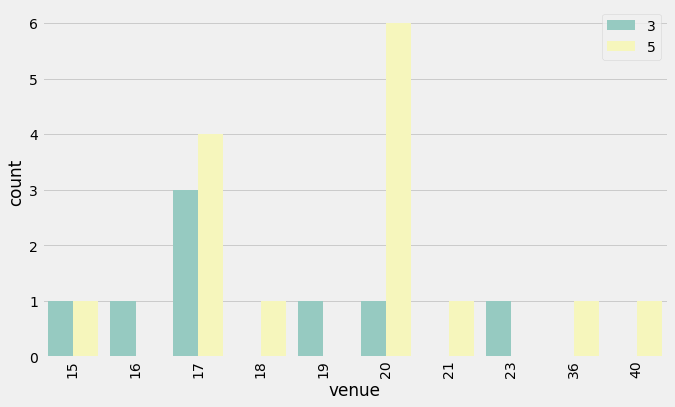

'JSCA International Stadium Complex'

In [144]:
#top 2 team analysis based on number of matches won against each other and how venue affects them?
#now let us compare venue against a match between CSK and RCB
#we find that CSK has won most matches against RCB in MA Chidambaram Stadium, Chepauk, Chennai
#RCB has not won any match with CSK in stadiums St George's Park and Wankhede Stadium, but won matches
#with CSK in Kingsmead, New Wanderers Stadium.
#It does prove that chances of CSK winning is more in Chepauk stadium when played against RCB.
# Proves venue is important feature in predictability
import seaborn as sns
team1=dicVal['CSK']
team2=dicVal['RCB']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set3')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()
le.classes_[15] 

## From the generic models, viz. logistic regression, KNN, Gausian Naive Bayes, SVM, Decision Tree algo, Random Forest Classifiers, we see that SVM, Decision Tree algorithm, and Random Forest Classifiers have an accuracy of 87%. 